In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline
plt.style.use('ggplot')

In [3]:
# Read in the data and form a dataframe
df = pd.read_csv('GlobalTemperatures.csv')

# Show the first 5 rows of the table
df.head(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Considering only the LandAverageTemperature

df = df.ix[:, :2]
# df = df.iloc[:, :2]  # Panda's recommended method. Above one is depreciated
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [5]:
df.describe()

,LandAverageTemperature
count,3180.000000
mean,8.374731
std,4.381310
min,-2.080000
25%,4.312000
50%,8.610500
75%,12.548250
max,19.021000


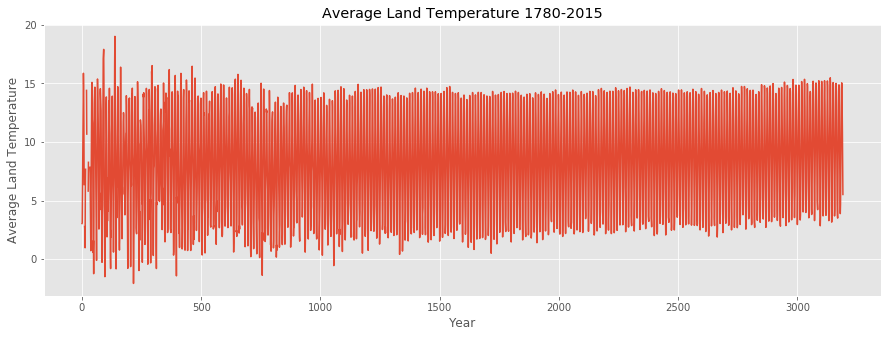

In [6]:
# Cursory plot 
plt.figure(figsize = (15, 5))  # Define how big graph is
plt.plot(df['LandAverageTemperature'])
plt.title('Average Land Temperature 1780-2015')
plt.xlabel("Year")
plt.ylabel("Average Land Temperature")
plt.show()

In [7]:
print(type(df['dt'][0]))

<class 'str'>


In [8]:
# Convert every date to datetime object

times = pd.DatetimeIndex(df['dt'])

# And group by year
grouped = df.groupby([times.year]).mean()

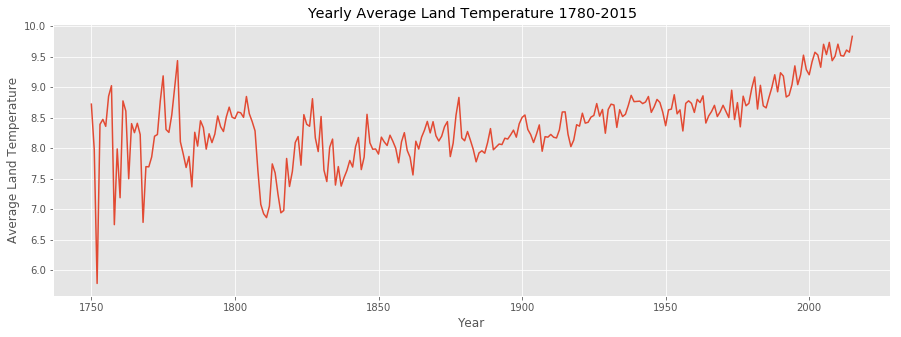

In [10]:
# Plot it again

plt.figure(figsize = (15, 5))  # Define how big graph is
plt.plot(grouped['LandAverageTemperature'])

# Change the features of the graph
plt.title('Yearly Average Land Temperature 1780-2015')
plt.xlabel("Year")
plt.ylabel("Average Land Temperature")
plt.show()

In [11]:
# What caused anomalies 
grouped.head()

,LandAverageTemperature
dt,
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333


In [12]:
# Check what happened at 1752
df[times.year == 1752]

,dt,LandAverageTemperature
24,1752-01-01,0.348
25,1752-02-01,NaN
26,1752-03-01,5.806
27,1752-04-01,8.265
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN
31,1752-08-01,NaN
32,1752-09-01,NaN
33,1752-10-01,7.839


In [13]:
# There are a lot of NaN values that caused the anomalies
df[np.isnan(df['LandAverageTemperature'])]

,dt,LandAverageTemperature
10,1750-11-01,NaN
16,1751-05-01,NaN
18,1751-07-01,NaN
21,1751-10-01,NaN
22,1751-11-01,NaN
23,1751-12-01,NaN
25,1752-02-01,NaN
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN


In [17]:
# Use the NaN with the previous month's values
df['LandAverageTemperature'] = df['LandAverageTemperature'].fillna(method="ffill")

# And reassign the grouped
grouped = df.groupby([times.year]).mean()

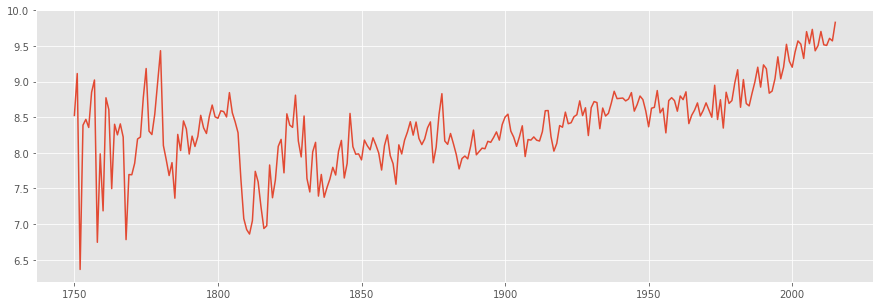

In [19]:
# Plot it again

plt.figure(figsize = (15, 5))  # Define how big graph is
plt.plot(grouped['LandAverageTemperature'])
plt.show()

# Modeling the Dataset

In [20]:
# let's model
from sklearn.linear_model import LinearRegression as lg

In [24]:
x = grouped.index.values.reshape(-1, 1)
y = grouped['LandAverageTemperature'].values

In [26]:
reg = lg()
reg.fit(x, y)
y_preds = reg.predict(x)
print(f"Accuracy {reg.score(x, y)}")

Accuracy 0.3766832275309071


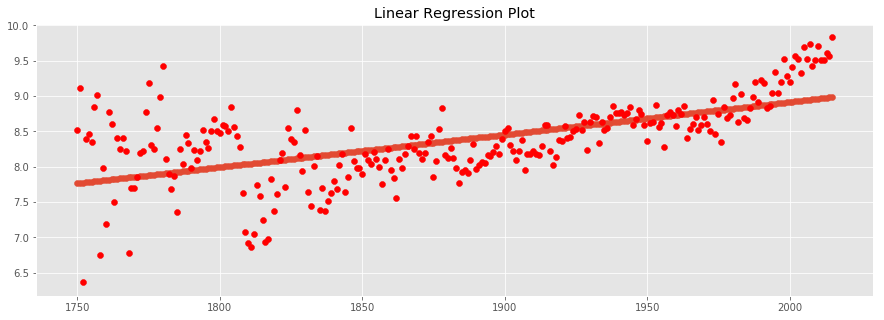

In [27]:
# Plot how inaccurate the prediction is
plt.figure(figsize = (15, 5))
plt.title("Linear Regression Plot")
plt.scatter(x = x, y = y_preds)
plt.scatter(x = x, y = y, c = "r")
plt.show()

In [28]:
# Let's predict 2050!!
reg.predict(2050)

array([ 9.14631486])